# Mathematically speaking, waves can be described by a wave equation like:

## g(f) = A sin(2πft)

### Where:
### A = Amplitude or the Peak Value
### f = frequency
### t = time

We can easily create a function in Python to generate a NumPy array of a wave with respect to time, as shown in the following code:

In [1]:
import numpy as np

samplerate = 44100 #Frequecy in Hz, this is standard

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(440, 1)

#wave features
print(len(a_wave)) # 44100
print(np.max(a_wave)) # 4096
print(np.min(a_wave)) # -4096

44100
4095.9996855891045
-4095.999685589104


You can also plot this array using matplotlib to get a clear picture of what’s going on

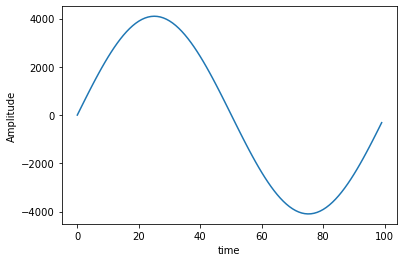

In [2]:
import matplotlib.pyplot as plt
plt.plot(a_wave[0:int(44100/440)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

A piano consists of multiple octaves. Although every octave is physically identical, it may sound a bit high-pitched or low-pitched with respect to the other  
If we want to create a single octave (set of 12 keys), then we must know how each key is calibrated in relation to the other. After that, we can just double (or half) the frequency of all the keys, to get the next octave  
Pianos are tuned using an “equal temperament system”. That means the relationship between the frequency of the keys (notes) is like this:  
## note_freq = base_freq * 2^(n/12)
### Where n is the number of notes away from the base note
For example, if we consider C as our base note, then C# will have the frequency = base_freq * 2^(1/12)  
We can easily build this logic with a single for loop in python

In [3]:
def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs

### Now to play a song
Let's play 'twinkle twinkle little star  
First we need to write down our notes

In [4]:
music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'

Now we need a function to concatenate all of the notes

In [5]:
def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'
data = get_song_data(music_notes)

data = data * (32600/np.max(data)) # Adjusting the Amplitude (Optional)

Write the song into a file using Scipy and play

In [6]:
from scipy.io.wavfile import write
write('twinkle-twinkle.wav', samplerate, data.astype(np.int16))